
- [Machine Learning: Validation vs Testing](https://youtu.be/pGlQLMPI46g)
    - 검증데이터의 용도와 테스트 데이터의 용도를 설명해보라.
    
- [Overfitting 4: training, validation, testing](https://youtu.be/4wGquWG-vGw)
    - 테스트 데이터로 예측한 후 모델을 수정해 또 테스트 데이터로 예측하는 행동은 왜 피해야 할까?

- [StatQuest: Logistic Regression](https://www.youtube.com/watch?v=yIYKR4sgzI8&feature=youtu.be)
    - 로지스틱회귀와 선형회귀분석과 차이점이 무엇인가?

#### 다음 글을 읽어 보세요:
- [How (and why) to create a good validation set](https://www.fast.ai/2017/11/13/validation-sets/)
    - 시계열(time series) 데이터를 훈련/검증/테스트 세트로 나눌 때 무엇을 주의해야 하나?

# 데이터를 훈련/검증/테스트(train/validate/test) 세트로 나누어 보자.

## 타이타닉호 생존자 예측

캐글(Kaggle) 에서 초기 입문자들에게 유명한 Titanic: Machine Learning from Disaster 데이터로 학습을 진행해 보자.
- [Kaggle has used the Titanic dataset](https://www.kaggle.com/c/titanic/data)

캐글은 참가자들에게 데이터셋을 보통 훈련/테스트로 나누어 제공한다.


In [1]:
import pandas as pd
train = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/titanic/train.csv')
test = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/titanic/test.csv')

테스트데이터는 특성의 개수가 한 개 적다.

In [2]:
print("train features: ", train.shape[1])
print("test features: ", test.shape[1])

train features:  12
test features:  11


어떤 특성이 test 데이터에 없는 타겟인지 확인해 보자

In [3]:
print("target col: ", train.columns.difference(test.columns)[0])

target col:  Survived


캐글에서는 보통 훈련데이터와 테스트데이터를 분리하여 제공한다. 그런데 테스트 데이터에서는 타겟정보를 제외해 놓았다.

- 캐글은 테스트 데이터에 대한 타겟 정보도 가지고 있을 텐데 **왜 테스트 데이터의 타겟 정보를 제공하지 않을까?**

    - 가장 큰 이유는 모델의 일반화 성능을 올바르게 측정하기 위해서이다.

- 그렇다면 데이터를 훈련/테스트 세트로 나누는 것에 더해 **왜 검증세트가 필요한 것일까?**
    - 왜냐하면 훈련세트로 모델을 한 번에 완전하게 학습시키기가 어렵기 때문이다. 훈련세트로 다르게 튜닝된 여러 모델들을 학습한 후 어떤 모델이 학습이 잘 되었는지 검증하고 선택하는 과정이 필요하다.
    
이렇게 훈련/검증세트로 좋은 모델을 만들어 낸 후 최종적으로 테스트세트에는 단 한번의 예측테스트를 진행한다. 최종테스트 결과가 마음에 들지 않는다고 모델을 또 수정하여 테스트 세트를 더 잘 예측하는 모델을 만든다면 그 모델은 테스트세트에 과적합하여 일반화 성능이 떨어지게 될 수 있다.

### 훈련/검증/테스트 세트로 나누는 것은 머신러닝 모델 학습에서 매우 중요하다. 

- 훈련데이터는 모델을 Fit 하는데 사용한다.
- 검증데이터는 예측 모델을 선택하기 위해서 예측의 오류를 측정할 때 사용한다. 
- 테스트데이터는 일반화 오류를 평가하기 위해 선택된 모델에 한하여 마지막에 한 번 사용한다. 테스트세트는 훈련이나 검증과정에서 사용하지 않도록 주의해야한다. 

테스트데이터가 유출(leak)이 되어 훈련/검증과정에 사용이 되면 모델을 잘못 평가하게 된다.

#### [모델 검증](https://sebastianraschka.com/blog/2018/model-evaluation-selection-part4.html)

<img src="https://sebastianraschka.com/images/blog/2018/model-evaluation-selection-part4/model-eval-conclusions.jpg" width="600">

학습 모델을 개발할 때, **모델선택(Model selection)** 을 수행해야 한다.
이때 **하이퍼파라미터(hyperparameter)** 튜닝을 하게 되는데 튜닝의 효과를 확인하기 위해서 검증세트가 필요하다. 테스트 세트로 하이퍼파라미터 튜닝을 하면 절대로 안된다. 데이터가 많을 경우에는 전체 데이터를 훈련/검증/테스트 세트로 나누면 되지만, 상대적으로 데이터 수가 적을 경우 **K-fold 교차검증(k-fold cross-validation)** 을 진행할 수  있다. 물론 이때도 테스트 세트는 미리 떼어 놓아야 한다.

## 캐글 데이터세트 나누기

캐글에서 미리 테스트세트를 나누어 주었으니 훈련데이터를 다시 훈련/검증 세트로 나누면 된다.

sklearn 함수 train_test_split을 사용해 훈련/검증 세트로 나누어 보자.

- [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [4]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(train, random_state=2)
print("train shape: ", train.shape)
print("val shape: ", val.shape)

train shape:  (668, 12)
val shape:  (223, 12)


## 분류(Classification) 문제를 다루어 보자

## 분류문제는 회귀문제와 다른 기준으로 기준모델을 설정한다.
**다수 클래스를 기준모델로 정하는 방법(Majority class baseline)** 에 대해 알아 보자.

- 회귀문제에서는 보통 타겟 변수의 **평균**값을 기준모델로 사용한다.
- 분류문제에서는 보통 타겟 변수에서 가장 **빈번하게 나타나는 범주**를 기준모델로 설정한다.
- 시계열(time-series) 데이터는 보통 어떤 시점을 기준으로 **이전 시간의 데이터**가 기준모델이 된다.


분류문제 에서는 타겟 변수가 편중된 범주비율을 가지는 경우가 많다.

- 클래스 1과 0 비율이 9:1인 학습 데이터를 가지고 모델을 만들었는데 모델 예측 정확도가 90% 나왔다! 어떻게 이렇게 좋은 성능이 나왔을까? 이 모델의 성능은 문제가 없는 것 일까? 불균형한 데이터를 사용해 ML 모델을 만드는데는 상당한 주의가 필요하다. 

    - 이 데이터는 모델이 무조건 클래스 1만 찍도록 만들면 정확도 90%를 달성할 수 있다. 그러므로 이런 경우 클래스 1에 대한 정확도가 90% 인 기준모델을 설정하고 더 좋은 성능을 가지는 모델을 만들기 위해 노력해야 한다.

## 분류문제를 풀기전에 항상 먼저 타겟 범주가 어떤 비율을 가지고 있는지 확인해 보아야 한다.

In [6]:
# 타겟을 정한다
# survived => 0 = No, 1 = Yes
target = 'Survived'

In [7]:
# 타겟 데이터 범주의 비율을 확인한다.
y_train = train[target]
y_train.value_counts(normalize=True)

0    0.625749
1    0.374251
Name: Survived, dtype: float64

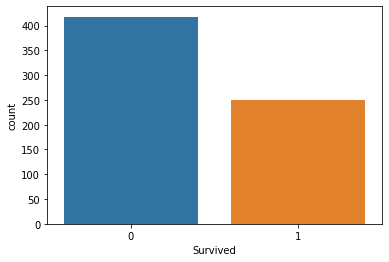

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(x=y_train);

## (분류문제의 기준모델) 범주 0 (majority class)으로 모든 예측을 수행해 보자.

In [9]:
# mode(): Return the highest frequency value in a Series.
major = y_train.mode()[0]

# 타겟 샘플 수 만큼 0이 담긴 리스트를 만든다. 기준모델로 예측
y_pred = [major] * len(y_train)

### 분류에서는 회귀와 다른 평가지표(evaluation metrics)를 사용한다. 
[scikit-learn, Scoring functions](https://scikit-learn.org/stable/modules/model_evaluation.html)
- 절대로 _회귀_ 평가지표를 _분류_에 사용하시면 안됩니다. 그 반대도 마찬가지다.

- 정확도([Accuracy](https://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score)) 는 분류문제에서 사용하는 평가지표다.

Accuracy = $\frac{올바르게 예측한 수} {전체 예측 수}$ = $\frac{TP + TN} {P + N}$
- [Proportion of correct classifications](https://en.wikipedia.org/wiki/Confusion_matrix)



이렇게 기준모델로 최다 비율 클래스를 사용할 경우 정확도를 구해보자.

In [10]:
# 최다 클래스의 빈도가 정확도가 된다.
from sklearn.metrics import accuracy_score
print("training accuracy: ", accuracy_score(y_train, y_pred))

training accuracy:  0.625748502994012


In [11]:
# 검증세트 에서도 정확도를 확인해 볼 수 있다.
y_val = val[target]
y_pred = [major] * len(y_val)
print("validation accuracy: ", accuracy_score(y_val, y_pred))

validation accuracy:  0.5874439461883408


# 로지스틱 회귀(Logistic Regression)

## (로지스틱회귀를 사용하기 전에) 분류문제를 선형회귀모델을 사용해 학습하면 어떤 결과가 나오는지 살펴보자.

In [12]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,668.000000,668.000000,668.000000,527.000000,668.000000,668.000000,668.000000
mean,443.224551,0.374251,2.303892,29.576376,0.501497,0.405689,32.583071
std,256.363463,0.484292,0.835234,14.118577,1.080701,0.835008,49.782390
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,225.750000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,445.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,663.500000,1.000000,3.000000,38.000000,1.000000,0.250000,31.068750
max,891.000000,1.000000,3.000000,71.000000,8.000000,6.000000,512.329200


In [13]:
train['Age']

199    24.0
129    45.0
90     29.0
230    35.0
126     NaN
       ... 
534    30.0
584     NaN
493    71.0
527     NaN
168     NaN
Name: Age, Length: 668, dtype: float64

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 199 to 168
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  668 non-null    int64  
 1   Survived     668 non-null    int64  
 2   Pclass       668 non-null    int64  
 3   Name         668 non-null    object 
 4   Sex          668 non-null    object 
 5   Age          527 non-null    float64
 6   SibSp        668 non-null    int64  
 7   Parch        668 non-null    int64  
 8   Ticket       668 non-null    object 
 9   Fare         668 non-null    float64
 10  Cabin        149 non-null    object 
 11  Embarked     666 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 67.8+ KB


In [15]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

# 숫자형 특성 만 사용하겠다.
features = ['Pclass', 'Age', 'Fare']
X_train = train[features]
X_val = val[features]

# Age, Cabin의 결측치를 평균 값으로 채운다.
from sklearn.impute import SimpleImputer

## default, imputing 'mean' value
imputer = SimpleImputer() 
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)

# 학습
linear_model.fit(X_train_imputed, y_train)

# 예측
pred = linear_model.predict(X_val_imputed)

### 회귀계수들의 수치를 확인해 보자.

In [16]:
pd.Series(linear_model.coef_, features)

Pclass   -0.203810
Age      -0.007513
Fare      0.000819
dtype: float64

- Pclass의 경우 높을 수록(2, 3등석) 생존률이 떨어지는 것으로 예상을 할 수 있고

- Age의 경우 많을 수록 생존률이 떨어진다고 볼 수 있다.

- Fare의 경우는 수치가 작지만 높을 수록 생존률이 올라간다.

### 가상으로 테스트 케이스를 만들어 예측을 진행해 보자
회귀계수를 알고 있으니 무조건 생존할 것 같은 데이터를 만들어보자.

Pclass는 낮추고(1등석) 5살의 어린 나이에 비싼 요금을 넣어보자. (1, 5, 600) 이 아기는 무조건 생존할 것 같다.

In [17]:
test_case = [[1, 5, 600]]
linear_model.predict(test_case)

array([1.28916042])

- 회귀모델이기 때문에 타겟변수값이 음수에서 양수까지 나타나는데 생존인지 아닌지 분명하게 결과를 알 수 없다. 게다가 회귀이기 때문에 분류모델에 사용하는 평가지표를 사용할 수 없다.

로지스틱회귀를 사용하면 타겟변수의 범주로 0과 1을 사용할 수 있으며 각 범주의 예측 확률값을 얻을 수 있다.

## 로지스틱 회귀모델

### 로지스틱회귀는 특성변수를 **로지스틱 함수** 형태로 표현한다.
<img src="https://qph.fs.quoracdn.net/main-qimg-6c3393d3dd37f9fdac89e7971126c726" width="500"/>

그래서 결과적으로 관측치가 특정 클래스에 속할 확률값으로 계산이 된다. 분류문제에서는 확률값을 사용하여 분류를 하는데, 예를들어 확률값이 정해진 기준값 보다 크면 1 아니면 0 이라고 예측을 하게 된다.

### Logit transformation
로지스틱회귀의 계수는 비선형 함수 내에 있어서 직관적으로 해석하기가 어려운데 **오즈(Odds)** 를 사용하면 선형결합 형태로 변환 가능해 보다 쉽게 해석이 가능하다. 오즈는 **실패확률에 대한 성공확률의 비** 인데 예를들어 odds = 4  이면 성공확률이 실패확률의 4배 라는 뜻이다. 분류문제에서는 클래스 1 확률에 대한 클래스 0 확률의 비라고 해석하면된다.

$Odds = \large \frac{p}{1-p}$, 

p = 성공확률, 1-p = 실패확률

p = 1 일때 odds = $\infty$

p = 0 일때 odds = 0

$\large ln(Odds) = ln(\frac{p}{1-p}) = ln(\frac{\frac {1}{1+e^{-(\beta _{0}+\beta _{1}X_{1}+\cdots +\beta _{p}X_{p})}}}{1 - \frac {1}{1+e^{-(\beta _{0}+\beta _{1}X_{1}+\cdots +\beta _{p}X_{p})}}}) = \normalsize \beta _{0}+\beta _{1}X_{1}+\cdots +\beta _{p}X_{p}$

이렇게 오즈에 로그를 취해 변환하는 것을 **로짓변환(Logit transformation)** 이라고 한다. 로짓변환을 통해 비선형형태인 로지스틱함수형태를 선형형태로 만들어 회귀계수의 의미를 해석하기 쉽게 하는데, 특성 X의 증가에 따라 **로짓(ln(odds))**가 얼마나 증가(or감소)했다고 해석을 할 수 있게된다.

(odds 확률로 해석을 하려면 exp(계수) = p 를 계산해서 특성 1단위 증가당 확률이 p배 증가한다고 해석을 할 수 있다.)

여기서 기존 로지스틱형태의 y 값은 0~1의 범위를 가졌다면 로짓은 -$\infty$ ~ $\infty$ 범위를 가지게 된다.

<img src="https://i.imgur.com/r2uD4dI.png" />

## 로지스틱회귀 모델을 만들어 보고 선형모델과 비교해 보자.

In [18]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X_train_imputed, y_train)

LogisticRegression()

학습된 로지스틱회귀 모델의 score 메소드는 분류 정확도를 리턴한다.

In [19]:
print('검증세트 정확도', logistic.score(X_val_imputed, y_val))

검증세트 정확도 0.7130044843049327


In [20]:
pred = logistic.predict(X_val_imputed)
pred

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0])

위에서 만들어 놓은 5살 아이의 테스트 케이스를 사용해 예측을 해 보자.

In [21]:
logistic.predict(test_case)

array([1])

분류에 기준이 되는 각 클래스에 속할 확률값을 확인할 수 있다.

In [22]:
logistic.predict_proba(test_case)

array([[0.01749669, 0.98250331]])

로지스틱회귀의 계수를 확인해 보자.

In [23]:
print(features)

# 선형회귀분석과 비교했을 때 회귀계수 수치는 변했지만 방향은 같음을 볼 수 있다.
print(logistic.coef_) 

['Pclass', 'Age', 'Fare']
[[-0.90248227 -0.03581619  0.00447486]]


계수가 양수인 경우 생존의 가능성을 높이고 음수인 경우 생존 가능성을 낮추는 것으로 해석할 수 있다.

### 타이타닉(Titanic) 데이터의 모든 특성을 사용한 모델을 만들어ㅂ자.

데이터를 모델에 적합하기 전에 3 가지 데이터 변환을 수행해보자.
- 카테고리 데이터 처리를 위해 OneHotEncoder
- 결측치(missing value) 처리를 위한 SimpleImputer
- 특성들의 척도를 맞추기 위해 표준정규분포로 표준화하는(평균=0, 표준편차=1) StandardScaler

In [24]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [25]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
199,200,0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0,0,248747,13.000,NaN,S
129,130,0,3,"Ekstrom, Mr. Johan",male,45.0,0,0,347061,6.975,NaN,S


In [26]:
train['Ticket'].value_counts()

347088          6
3101295         5
CA. 2343        5
S.O.C. 14879    5
382652          5
               ..
349203          1
113501          1
323592          1
2674            1
PC 17318        1
Name: Ticket, Length: 539, dtype: int64


- 사용 가능한 모든 변수를 선택하겠다. : `['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']`

- `PassengerId`, `Name`, `Cabin`, `Ticket`은 왜 사용하지 않을까?

학습에 사용할 transformer 대해서 살펴보자.
- [category_encoders.one_hot.OneHotEncoder](https://contrib.scikit-learn.org/categorical-encoding/onehot.html)
- [sklearn.impute.SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)
- [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
- [sklearn.linear_model.LogisticRegressionCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html)

In [27]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
199,200,0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0,0,248747,13.0000,NaN,S
129,130,0,3,"Ekstrom, Mr. Johan",male,45.0,0,0,347061,6.9750,NaN,S
90,91,0,3,"Christmann, Mr. Emil",male,29.0,0,0,343276,8.0500,NaN,S
230,231,1,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",female,35.0,1,0,36973,83.4750,C83,S
126,127,0,3,"McMahon, Mr. Martin",male,NaN,0,0,370372,7.7500,NaN,Q
257,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.5000,B77,S
163,164,0,3,"Calic, Mr. Jovo",male,17.0,0,0,315093,8.6625,NaN,S
111,112,0,3,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C
724,725,1,1,"Chambers, Mr. Norman Campbell",male,27.0,1,0,113806,53.1000,E8,S
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.3500,NaN,Q


In [29]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 2.4 MB/s eta 0:00:00


In [30]:
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'

X_train = train[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]


In [31]:
X_train.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
199,2,female,24.0,0,0,13.000,S
129,3,male,45.0,0,0,6.975,S
90,3,male,29.0,0,0,8.050,S


### 원핫인코딩을 수행한다.

In [32]:
encoder = OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
X_train_encoded.head(3)

,Pclass,Sex_female,Sex_male,Age,SibSp,Parch,Fare,Embarked_S,Embarked_Q,Embarked_C,Embarked_nan
199,2,1,0,24.0,0,0,13.000,1,0,0,0
129,3,0,1,45.0,0,0,6.975,1,0,0,0
90,3,0,1,29.0,0,0,8.050,1,0,0,0


### 결측치를 평균으로 변환한다.

In [33]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_encoded)
X_val_imputed = imputer.transform(X_val_encoded)

In [34]:
X_val_imputed[:5]

array([[ 1.    ,  0.    ,  1.    , 42.    ,  0.    ,  0.    , 26.2875,
         1.    ,  0.    ,  0.    ,  0.    ],
       [ 3.    ,  0.    ,  1.    , 21.    ,  0.    ,  0.    ,  8.05  ,
         1.    ,  0.    ,  0.    ,  0.    ],
       [ 2.    ,  1.    ,  0.    , 24.    ,  1.    ,  2.    , 65.    ,
         1.    ,  0.    ,  0.    ,  0.    ],
       [ 3.    ,  0.    ,  1.    , 28.    ,  0.    ,  0.    , 56.4958,
         1.    ,  0.    ,  0.    ,  0.    ],
       [ 3.    ,  1.    ,  0.    , 17.    ,  4.    ,  2.    ,  7.925 ,
         1.    ,  0.    ,  0.    ,  0.    ]])

### 특성값들을 표준화한다.

In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_val_scaled = scaler.transform(X_val_imputed)

In [36]:
X_train_scaled

array([[-0.36411341,  1.33976829, -1.33976829, ..., -0.32832052,
        -0.50327259, -0.05479966],
       [ 0.83405288, -0.74639772,  0.74639772, ..., -0.32832052,
        -0.50327259, -0.05479966],
       [ 0.83405288, -0.74639772,  0.74639772, ..., -0.32832052,
        -0.50327259, -0.05479966],
       ...,
       [-1.56227969, -0.74639772,  0.74639772, ..., -0.32832052,
         1.98699475, -0.05479966],
       [-1.56227969, -0.74639772,  0.74639772, ..., -0.32832052,
        -0.50327259, -0.05479966],
       [-1.56227969, -0.74639772,  0.74639772, ..., -0.32832052,
        -0.50327259, -0.05479966]])

평균은 0, 표준편차는 1로 표준화 되었다.

In [37]:
X_train_scaled.T[0].mean(), X_train_scaled.T[0].std()

(1.1168710666887802e-16, 1.0000000000000002)

In [38]:
model = LogisticRegression(random_state=1)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=1)

In [39]:
y_pred = model.predict(X_val_scaled)
accuracy_score(y_val, y_pred)

0.7892376681614349

### 계수들을 확인해 보자.

In [41]:
coefficients = pd.Series(model.coef_[0], X_train_encoded.columns)
coefficients

Pclass         -0.915833
Sex_female      0.662095
Sex_male       -0.662095
Age            -0.559957
SibSp          -0.406466
Parch          -0.015897
Fare            0.078016
Embarked_S     -0.094939
Embarked_Q      0.007684
Embarked_C      0.077224
Embarked_nan    0.188837
dtype: float64

좌석의 등급이 고급일수록, 나이가 어릴 수록, 남성보다는 여성의 생존이 더 높아짐을 계수들의 수치로 확인 할 수 있다.

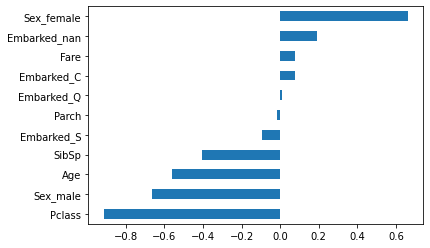

In [42]:
coefficients.sort_values().plot.barh();

In [43]:
# 절편(intercept)은 마이너스로 모든 특성이 0인 경우 생존하지 못할 가능성이 높다고 알려주긴 하지만 
# 사실 관측할 수 없는 예시로 해석이 크게 유용하지 않다.
model.intercept_

array([-0.71320882])

만든 모델을 테스트세트에 적용시켜 예측해 보고 [Kaggle](https://www.kaggle.com/c/titanic) 에 제출해보자.

In [44]:
X_test = test[features]
X_test_encoded = encoder.transform(X_test)
X_test_imputed = imputer.transform(X_test_encoded)
X_test_scaled = scaler.transform(X_test_imputed)

y_pred_test = model.predict(X_test_scaled)

In [45]:
y_pred_test

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [46]:
submission = test[['PassengerId']].copy()
submission['Survived'] = y_pred_test

In [47]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [48]:
submission.to_csv('submission_titanic.csv', index=False)

## 참고자료

#### Logistic Regression
- [5 Reasons “Logistic Regression” should be the first thing you learn when becoming a Data Scientist](https://towardsdatascience.com/5-reasons-logistic-regression-should-be-the-first-thing-you-learn-when-become-a-data-scientist-fcaae46605c4)
- [Logistic Regression Details Pt1: Coefficients](https://youtu.be/vN5cNN2-HWE)
- [Logistic Regression Details Pt 2: Maximum Likelihood](https://youtu.be/BfKanl1aSG0)
- [Probability of passing an exam versus hours of study](https://en.wikipedia.org/wiki/Logistic_regression#Probability_of_passing_an_exam_versus_hours_of_study)


#### Cross Validation

- [Training, Validation, and Testing Data Sets](https://end-to-end-machine-learning.teachable.com/blog/146320/training-validation-testing-data-sets)
- [R for Data Science](https://r4ds.had.co.nz/model-intro.html#hypothesis-generation-vs.hypothesis-confirmation), Hypothesis generation vs. hypothesis confirmation
-[How (and why) to create a good validation set](https://www.fast.ai/2017/11/13/validation-sets/)
-[Model Evaluation](https://sebastianraschka.com/blog/2018/model-evaluation-selection-part4.html)
-[A baseline for classification can be the most common class in the training dataset](https://twitter.com/koehrsen_will/status/1088863527778111488)

# Exercise

# Logistic Regression

이번에는 [**Cardiovascular Disease dataset**](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset) 데이터셋을 사용해 보자. 데이터에 대한 설명을 캐글 페이지에서 잘 살펴보고 진행하자.

## 1) 데이터 전처리
- 데이터를 불러오기.(read_csv 사용)
- id 칼럼은 drop하기.
- missing value를 확인하기.
- 중복된 샘플이 있는지 확인하기.


In [49]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/cardio/cardio_train.csv', sep=';')

In [50]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [51]:
df.drop(['id'],axis = 1, inplace=True)
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [52]:
df.duplicated().sum()

24

In [53]:
df = df.drop_duplicates()

## 2) 다운로드 한 훈련 데이터를 훈련/검증/테스트 세트로 나누기.
- 타겟 특성을 확인하고 타겟 변수를 나누어 준다.
- 훈련과 테스트 데이터로 나누어 준다(train_test_split 사용, train/test = 80/20, random_state=2)
- 훈련데이터를 훈련과 검증데이터로 나누어 준다(train_test_split 사용, train/validation = 80/20, random_state=2)

In [54]:
from sklearn.model_selection import train_test_split
import numpy as np

target = 'cardio'
#label = df[[target]]
#xdata = df.drop(['target'], axis= 1)
X_train, X_test = train_test_split(df, test_size = 0.2 , random_state=2)

In [55]:
X_train, X_val = train_test_split(X_train, test_size = 0.2 , random_state=2)

In [56]:
X_val.shape

(11196, 12)

## 3) 사이킷런의 LogisticRegression을 사용해 모델을 만들어보라.
- 모델을 만들기 전에 기준모델을 설정한다.


In [57]:
y_train = X_train[target]
y_train.value_counts(normalize=True)

1    0.501697
0    0.498303
Name: cardio, dtype: float64

In [58]:
y_test = X_test[target]

In [59]:
major = y_train.mode()[0]
y_pred = [major] * len(y_train)

from sklearn.metrics import accuracy_score
print("training accuracy: ", accuracy_score(y_train, y_pred))

y_val = X_val[target]
y_pred = [major] * len(y_val)
print("validation accuracy: ", accuracy_score(y_val, y_pred))

training accuracy:  0.501697034655234
validation accuracy:  0.49821364773133264


In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
X_train.drop(['cardio'], axis= 1, inplace=True)
X_val.drop(['cardio'], axis= 1, inplace=True)
X_test.drop(['cardio'], axis= 1, inplace=True)

In [62]:
logistic = LogisticRegression(max_iter=1000)
logistic.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [63]:
print('검증세트 정확도', logistic.score(X_val, y_val))

검증세트 정확도 0.7073061807788495


## 4) 데이터에서 범주형 성질을 지닌 특성을 찾아 원핫인코딩 하라.
- category_encoders를 사용해서 'gender' 특성만 원핫인코딩을 수행.
- LogisticRegression 모델을 다시 학습.

In [64]:
df.head(1)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69976 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          69976 non-null  int64  
 1   gender       69976 non-null  int64  
 2   height       69976 non-null  int64  
 3   weight       69976 non-null  float64
 4   ap_hi        69976 non-null  int64  
 5   ap_lo        69976 non-null  int64  
 6   cholesterol  69976 non-null  int64  
 7   gluc         69976 non-null  int64  
 8   smoke        69976 non-null  int64  
 9   alco         69976 non-null  int64  
 10  active       69976 non-null  int64  
 11  cardio       69976 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


In [66]:
!pip install category_encoders
from category_encoders import OneHotEncoder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [67]:
X_train['gender'] = X_train['gender'].astype('category')
X_val['gender'] = X_val['gender'].astype('category')
X_test['gender'] = X_test['gender'].astype('category')

In [68]:
encoder = OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
X_train_encoded.head(3)

,age,gender_1.0,gender_2.0,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
221,17591,1,0,157,70.0,160,100,3,1,0,0,0
59211,19677,0,1,174,80.0,150,80,1,1,0,0,1
26654,23504,1,0,158,76.0,140,90,3,3,0,0,1


In [69]:
logistic = LogisticRegression(max_iter=1000)
logistic.fit(X_train_encoded, y_train)

LogisticRegression(max_iter=1000)

In [70]:
print('검증세트 정확도', logistic.score(X_val_encoded, y_val))

검증세트 정확도 0.6944444444444444


## 5) 학습한 모델을 검증세트에서 최적화 시킨 후, 테스트세트에서 딱 한 번 정확도를 확인해보라.

In [71]:
X_train['gender'] = X_train['gender'].astype('category')
X_val['gender'] = X_val['gender'].astype('category')
X_test['gender'] = X_test['gender'].astype('category')

X_train['cholesterol'] = X_train['cholesterol'].astype('category')
X_val['cholesterol'] = X_val['cholesterol'].astype('category')
X_test['cholesterol'] = X_test['cholesterol'].astype('category')

X_train['gluc'] = X_train['gluc'].astype('category')
X_val['gluc'] = X_val['gluc'].astype('category')
X_test['gluc'] = X_test['gluc'].astype('category')

X_train['smoke'] = X_train['smoke'].astype('category')
X_val['smoke'] = X_val['smoke'].astype('category')
X_test['smoke'] = X_test['smoke'].astype('category')

X_train['alco'] = X_train['alco'].astype('category')
X_val['alco'] = X_val['alco'].astype('category')
X_test['alco'] = X_test['alco'].astype('category')

X_train['active'] = X_train['active'].astype('category')
X_val['active'] = X_val['active'].astype('category')
X_test['active'] = X_test['active'].astype('category')

In [72]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44784 entries, 221 to 49770
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          44784 non-null  int64   
 1   gender       44784 non-null  category
 2   height       44784 non-null  int64   
 3   weight       44784 non-null  float64 
 4   ap_hi        44784 non-null  int64   
 5   ap_lo        44784 non-null  int64   
 6   cholesterol  44784 non-null  category
 7   gluc         44784 non-null  category
 8   smoke        44784 non-null  category
 9   alco         44784 non-null  category
 10  active       44784 non-null  category
dtypes: category(6), float64(1), int64(4)
memory usage: 2.3 MB


In [73]:
encoder = OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
X_test_encoded = encoder.transform(X_test)
X_train_encoded.head(3)

,age,gender_1.0,gender_2.0,height,weight,ap_hi,ap_lo,cholesterol_3.0,cholesterol_1.0,cholesterol_2.0,gluc_1.0,gluc_3.0,gluc_2.0,smoke_0.0,smoke_1.0,alco_0.0,alco_1.0,active_0.0,active_1.0
221,17591,1,0,157,70.0,160,100,1,0,0,1,0,0,1,0,1,0,1,0
59211,19677,0,1,174,80.0,150,80,0,1,0,1,0,0,1,0,1,0,0,1
26654,23504,1,0,158,76.0,140,90,1,0,0,0,1,0,1,0,1,0,0,1


In [74]:
X_train_encoded['age'] = X_train_encoded['age'] / 365
X_val_encoded['age'] = X_val_encoded['age'] / 365
X_test_encoded['age'] = X_test_encoded['age'] / 365

In [75]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [76]:
logistic = LogisticRegression(max_iter=1000)
logistic.fit(X_train_scaled, y_train)

print('검증세트 정확도', logistic.score(X_val_scaled, y_val))

검증세트 정확도 0.7240085744908896


In [77]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
pred = lr.predict(X_val_scaled)

from sklearn.model_selection import GridSearchCV

params = {'penalty':['l2', 'l1'],
         'C':[0.001, 0.01, 0.1, 1, 2, 3, 5, 10, 20,100]}

grid = GridSearchCV(lr, param_grid=params, scoring='accuracy', cv=5)
grid.fit(X_train_scaled, y_train)
print('최적 하이퍼 파라미터 :{0}, 최적 평균 정확도 :{1:.3f}'.format(grid.best_params_,
                                                   grid.best_score_))

최적 하이퍼 파라미터 :{'C': 10, 'penalty': 'l2'}, 최적 평균 정확도 :0.721


In [78]:
print('테스트세트 정확도', logistic.score(X_test_scaled, y_test))

테스트세트 정확도 0.7262789368390968


In [79]:
print('테스트세트 정확도', grid.score(X_test_scaled, y_test))

테스트세트 정확도 0.7266361817662189


## 6) EDA를 추가적으로 수행하고 아래 질문에 대한 본인만의 근거와 수행결과를 논해보자. 
- 새로운 특성을 만들 수 있다면, 어떤 특성공학을 해 볼 수 있을까? 
- 아웃라이어가 있는 특성이 있다면, 어떤 기준으로 제거할 수 있을까? 
- [feature scaling](https://scikit-learn.org/stable/modules/preprocessing.html) 문서를 보면 여러가지 종류의 Scalar가 있는데, 각 Scalar는 각각 어떤 상황에 적용하면 좋을까? 본 데이터에서는 어떤 scalar를 적용해볼 수 있을까? 
- 모델 성능을 높이기 위해 어떤 튜닝을 추가해 볼 수 있을까? 

In [80]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [81]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000
mean,19468.950126,1.349648,164.359152,74.208519,128.820453,96.636261,1.366997,1.226535,0.088159,0.053790,0.803718,0.499771
std,2467.374620,0.476862,8.211218,14.397211,154.037729,188.504581,0.680333,0.572353,0.283528,0.225604,0.397187,0.500004
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
df['gender'].value_counts()

1    45509
2    24467
Name: gender, dtype: int64

In [84]:
clean_df = df[df['ap_hi'] < 300]  
clean_df = clean_df[clean_df['ap_lo'] < 300] 

clean_df = clean_df[clean_df['ap_hi'] > 0]  
clean_df = clean_df[clean_df['ap_lo'] > 0] 

clean_df.reset_index(drop=True, inplace=True)
print(clean_df.shape)

(68961, 12)


In [85]:
clean_df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [86]:
from sklearn import preprocessing

In [87]:
clean_df['age'] = clean_df['age'] / 365

In [88]:
conti_col = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
cate_col = ['cholesterol', 'gluc']
bin_cols = ['gender', 'smoke', 'alco', 'active', 'cardio']

In [89]:
min_max_scaler = preprocessing.MinMaxScaler()

df_scaled = min_max_scaler.fit_transform(clean_df[conti_col])
df_normalized = pd.DataFrame(df_scaled)
df_normalized.columns = conti_col
df_normalized.head()

,age,height,weight,ap_hi,ap_lo
0,0.588076,0.579487,0.269841,0.442060,0.417989
1,0.730159,0.517949,0.391534,0.570815,0.470899
2,0.624003,0.564103,0.280423,0.527897,0.365079
3,0.528455,0.584615,0.375661,0.613734,0.523810
4,0.516918,0.517949,0.238095,0.399142,0.312169


In [90]:
df_cate_col = clean_df[cate_col].astype('category')

In [91]:
encoder = OneHotEncoder(use_cat_names=True)
cate_col_encoded = encoder.fit_transform(df_cate_col)
cate_col_encoded.head()

,cholesterol_1.0,cholesterol_3.0,cholesterol_2.0,gluc_1.0,gluc_2.0,gluc_3.0
0,1,0,0,1,0,0
1,0,1,0,1,0,0
2,0,1,0,1,0,0
3,1,0,0,1,0,0
4,1,0,0,1,0,0


In [92]:
cate_col_encoded.isnull().shape

(68961, 6)

In [93]:
df_normalized.shape

(68961, 5)

In [94]:
cate_col_encoded

,cholesterol_1.0,cholesterol_3.0,cholesterol_2.0,gluc_1.0,gluc_2.0,gluc_3.0
0,1,0,0,1,0,0
1,0,1,0,1,0,0
2,0,1,0,1,0,0
3,1,0,0,1,0,0
4,1,0,0,1,0,0
...,...,...,...,...,...,...
68956,1,0,0,1,0,0
68957,0,0,1,0,1,0
68958,0,1,0,1,0,0
68959,1,0,0,0,1,0


In [95]:
df_normalized

,age,height,weight,ap_hi,ap_lo
0,0.588076,0.579487,0.269841,0.442060,0.417989
1,0.730159,0.517949,0.391534,0.570815,0.470899
2,0.624003,0.564103,0.280423,0.527897,0.365079
3,0.528455,0.584615,0.375661,0.613734,0.523810
4,0.516918,0.517949,0.238095,0.399142,0.312169
...,...,...,...,...,...
68956,0.653659,0.579487,0.343915,0.484979,0.417989
68957,0.913899,0.528205,0.608466,0.570815,0.470899
68958,0.640186,0.656410,0.497354,0.742489,0.470899
68959,0.900736,0.553846,0.322751,0.549356,0.417989


In [96]:
df_pre = pd.concat([df_normalized, cate_col_encoded], axis=1)
df_pre.isnull().sum()

age                0
height             0
weight             0
ap_hi              0
ap_lo              0
cholesterol_1.0    0
cholesterol_3.0    0
cholesterol_2.0    0
gluc_1.0           0
gluc_2.0           0
gluc_3.0           0
dtype: int64

In [97]:
df_pre = pd.concat([df_normalized, cate_col_encoded], axis=1)
df_pre = pd.concat([df_pre, clean_df[bin_cols]], axis=1)
df_pre['gender'] = df_pre['gender'] -1

In [98]:
df_pre.head()

,age,height,weight,ap_hi,ap_lo,cholesterol_1.0,cholesterol_3.0,cholesterol_2.0,gluc_1.0,gluc_2.0,gluc_3.0,gender,smoke,alco,active,cardio
0,0.588076,0.579487,0.269841,0.442060,0.417989,1,0,0,1,0,0,1,0,0,1,0
1,0.730159,0.517949,0.391534,0.570815,0.470899,0,1,0,1,0,0,0,0,0,1,1
2,0.624003,0.564103,0.280423,0.527897,0.365079,0,1,0,1,0,0,0,0,0,0,1
3,0.528455,0.584615,0.375661,0.613734,0.523810,1,0,0,1,0,0,1,0,0,1,1
4,0.516918,0.517949,0.238095,0.399142,0.312169,1,0,0,1,0,0,0,0,0,0,0


In [99]:
df_pre.isnull().sum()

age                0
height             0
weight             0
ap_hi              0
ap_lo              0
cholesterol_1.0    0
cholesterol_3.0    0
cholesterol_2.0    0
gluc_1.0           0
gluc_2.0           0
gluc_3.0           0
gender             0
smoke              0
alco               0
active             0
cardio             0
dtype: int64

In [100]:
df_pre


,age,height,weight,ap_hi,ap_lo,cholesterol_1.0,cholesterol_3.0,cholesterol_2.0,gluc_1.0,gluc_2.0,gluc_3.0,gender,smoke,alco,active,cardio
0,0.588076,0.579487,0.269841,0.442060,0.417989,1,0,0,1,0,0,1,0,0,1,0
1,0.730159,0.517949,0.391534,0.570815,0.470899,0,1,0,1,0,0,0,0,0,1,1
2,0.624003,0.564103,0.280423,0.527897,0.365079,0,1,0,1,0,0,0,0,0,0,1
3,0.528455,0.584615,0.375661,0.613734,0.523810,1,0,0,1,0,0,1,0,0,1,1
4,0.516918,0.517949,0.238095,0.399142,0.312169,1,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68956,0.653659,0.579487,0.343915,0.484979,0.417989,1,0,0,1,0,0,1,1,0,1,0
68957,0.913899,0.528205,0.608466,0.570815,0.470899,0,0,1,0,1,0,0,0,0,1,1
68958,0.640186,0.656410,0.497354,0.742489,0.470899,0,1,0,1,0,0,1,0,1,0,1
68959,0.900736,0.553846,0.322751,0.549356,0.417989,1,0,0,0,1,0,0,0,0,0,1


In [101]:
X_train, X_test = train_test_split(df_pre, test_size = 0.2 , random_state=2)
X_train, X_val = train_test_split(X_train, test_size = 0.2 , random_state=2)
y_train = X_train[target]
y_test = X_test[target]
y_val = X_val[target]

X_train.drop(['cardio'], axis= 1, inplace=True)
X_val.drop(['cardio'], axis= 1, inplace=True)
X_test.drop(['cardio'], axis= 1, inplace=True)

In [102]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
pred = lr.predict(X_val)

from sklearn.model_selection import GridSearchCV

params = {'penalty':['l2', 'l1'],
         'C':[0.01, 0.1, 1, 2, 3, 5, 10, 15, 20, 25]}

grid = GridSearchCV(lr, param_grid=params, scoring='accuracy', cv=5)
grid.fit(X_train, y_train)
print('최적 하이퍼 파라미터 :{0}, 최적 평균 정확도 :{1:.3f}'.format(grid.best_params_,
                                                   grid.best_score_))

최적 하이퍼 파라미터 :{'C': 20, 'penalty': 'l2'}, 최적 평균 정확도 :0.726


In [103]:
print('테스트세트 정확도', grid.score(X_test, y_test))

테스트세트 정확도 0.7325454940912057


In [104]:
lr = LogisticRegression(max_iter=1000, penalty='l2', C =20)
lr.fit(X_train, y_train)

LogisticRegression(C=20, max_iter=1000)

In [105]:
lr.coef_

array([[ 1.80123697, -1.02786097,  2.20012336, 10.63380118,  4.28011724,
        -2.12743066, -1.04972385, -1.72385887, -1.50201376, -1.52439976,
        -1.87459985, -0.01566515, -0.16714091, -0.19042774, -0.19761029]])

In [106]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train)
model = sm.Logit(y_train, X_train)
results = model.fit()

results.summary()

Optimization terminated successfully.
         Current function value: 0.568505
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 cardio   No. Observations:                44134
Model:                          Logit   Df Residuals:                    44119
Method:                           MLE   Df Model:                           14
Date:                Tue, 14 Mar 2023   Pseudo R-squ.:                  0.1798
Time:                        00:51:44   Log-Likelihood:                -25090.
converged:                       True   LL-Null:                       -30590.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -4.9318        nan        nan        nan         nan         nan
age                 1.8012      0.059     30.350      0.000       1.685       1.917
height             -1.0319      0.306     -3.369      0.001      -1.632      -0.432
weight              2.2010      0.162     13.616      0.000       1.884       2.518
ap_hi              10.6579      0.237     44.957      0.000      10.193      11.123
ap_lo               4.2738      0.303     14.112      0.000       3.680       4.867
cholesterol_1.0    -2.1375        nan        nan        nan         nan         nan
cholesterol_3.0    -1.0600        nan        nan        nan         nan         nan
cholesterol_2.0    -1.7343        nan        nan        nan         nan         nan
gluc_1.0           -1.5123   5.98e+05  -2.53e-06      1.000   -1.17e+06    1.17e+06
gluc_2.0           -1.5347   5.98e+05  -2.57e-06      1.000   -1.17e+06    1.17e+06
gluc_3.0           -1.8848   5.98e+05  -3.15e-06      1.000   -1.17e+06    1.17e+06
gender             -0.0156      0.027     -0.575      0.565      -0.069       0.038
smoke              -0.1672      0.043     -3.900      0.000      -0.251      -0.083
alco               -0.1906      0.053     -3.612      0.000      -0.294      -0.087
active             -0.1978      0.027     -7.272      0.000      -0.251      -0.145
===================================================================================
"""

In [107]:
results.params

const              -4.931751
age                 1.801177
height             -1.031924
weight              2.201038
ap_hi              10.657885
ap_lo               4.273772
cholesterol_1.0    -2.137494
cholesterol_3.0    -1.059955
cholesterol_2.0    -1.734309
gluc_1.0           -1.512267
gluc_2.0           -1.534663
gluc_3.0           -1.884826
gender             -0.015572
smoke              -0.167196
alco               -0.190623
active             -0.197844
dtype: float64

In [108]:
np.exp(results.params)

const                  0.007214
age                    6.056774
height                 0.356321
weight                 9.034391
ap_hi              42526.607635
ap_lo                 71.791931
cholesterol_1.0        0.117950
cholesterol_3.0        0.346471
cholesterol_2.0        0.176522
gluc_1.0               0.220410
gluc_2.0               0.215528
gluc_3.0               0.151856
gender                 0.984549
smoke                  0.846034
alco                   0.826444
active                 0.820498
dtype: float64

In [109]:
X_test = sm.add_constant(X_test)
predicted = results.predict(X_test)

actual = y_test
act_pred_df = pd.DataFrame({'actual': actual, 'predicted': predicted, 'error': actual - predicted})
act_pred_df.head()

,actual,predicted,error
48992,1,0.790342,0.209658
38938,0,0.128366,-0.128366
19399,1,0.327777,0.672223
56946,0,0.582895,-0.582895
50186,0,0.346403,-0.346403


In [110]:
pred = results.predict(X_test)

In [111]:
pred

48992    0.790342
38938    0.128366
19399    0.327777
56946    0.582895
50186    0.346403
           ...   
52911    0.829486
55339    0.495788
53847    0.810723
49380    0.225915
17359    0.764456
Length: 13793, dtype: float64

In [112]:
def cut_off(y, threshold) :
    Y = y.copy()  # 대문자 Y를 새로운 변수로 하여 기존의 y값에 영향이 가지 않도록 한다.
    Y[Y>threshold] = 1
    Y[Y<threshold] = 0
    return Y.astype(int)
    
pred_Y = cut_off(pred, 0.5)
pred_Y

48992    1
38938    0
19399    0
56946    1
50186    0
        ..
52911    1
55339    0
53847    1
49380    0
17359    1
Length: 13793, dtype: int64

In [113]:
from sklearn.metrics import confusion_matrix
cfmat = confusion_matrix(y_test,pred_Y)
print(cfmat)

[[5500 1485]
 [2205 4603]]


In [114]:
def acc(cfmat):
	return (cfmat[0,0] + cfmat[1,1])/(cfmat[0,0] + cfmat[1,1] + cfmat[0,1] + cfmat[1,0])
acc(cfmat)

0.7324729935474517